# Orthogonal Gradient Descent

In [1]:
%load_ext autoreload
%autoreload 2

# Global imports and settings

In [19]:
import pickle
from torchvision.transforms import ToTensor, Compose, Normalize
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [5]:
from avalanche.benchmarks.classic import PermutedMNIST
from avalanche.models import SimpleMLP
from avalanche.training.plugins import EvaluationPlugin
from avalanche.logging import InteractiveLogger
from avalanche.evaluation.metrics import (
    accuracy_metrics,
)

from torch.nn import CrossEntropyLoss
from torch.optim import SGD

/Users/jesusoyanedelespinoza/.pyenv/versions/3.9.18/envs/tt2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Custom libraries

In [20]:
import sys

sys.path.append("..")

from base_code.training.ogd import OGD
from base_code.constants import DATASETS_PATH, SAVED_METRICS_PATH

# Dataset and definitions

## Preprocessing definitions

In [7]:
train_transform = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])
test_transform = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

## Dataset loading

In [8]:
scenario = PermutedMNIST(
    10,
    dataset_root=DATASETS_PATH,
    seed=1234,
)

## Scenario creation with train test streams

In [9]:
train_stream = scenario.train_stream
test_stream = scenario.test_stream

## Evaluation metrics definition

In [10]:
eval_plugin = EvaluationPlugin(
    accuracy_metrics(experience=True, stream=True),
    loggers=[InteractiveLogger()]
)

## Model, Optimizer, Loss and Strategy definitions

In [11]:
model = SimpleMLP(num_classes=scenario.n_classes, input_size=28 * 28, hidden_size=100, hidden_layers=2)
optimizer = SGD(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
strategy = OGD(
    model, optimizer, criterion, train_mb_size=256, train_epochs=5, evaluator=eval_plugin, eval_mb_size=128
)

# Training and evaluation

In [12]:
results = []

for experience in tqdm(train_stream):
    strategy.train(experience)
    metrics = strategy.eval(test_stream)
    results.append(metrics)

  0%|          | 0/10 [00:00<?, ?it/s]

-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 72.00it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 72.89it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 73.55it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 73.31it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 71.70it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 154.12it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.0045
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 153.93it/s]
> Eval on experience 1 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.0007
-- Starting eval on experience 2 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 153.76it/s]
> Eval

 10%|█         | 1/10 [00:25<03:51, 25.77s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.0013
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.0014
-- >> Start of training phase << --
100%|██████████| 235/235 [00:08<00:00, 26.83it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:08<00:00, 26.83it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:08<00:00, 26.77it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:08<00:00, 26.81it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:08<00:00, 26.79it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 151.23it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.0017
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 152.73it/s]
> Eval on experience 1 (Task 

 20%|██        | 2/10 [01:30<06:27, 48.48s/it]

-- >> Start of training phase << --
100%|██████████| 235/235 [00:15<00:00, 15.44it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:15<00:00, 15.06it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:15<00:00, 15.10it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:15<00:00, 15.18it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:15<00:00, 15.13it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 134.67it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.0053
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 145.62it/s]
> Eval on experience 1 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.3836
-- Starting eval on experience 2 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 146.41it/s]
> Eval

 30%|███       | 3/10 [03:26<09:15, 79.42s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.0916
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.1660
-- >> Start of training phase << --
100%|██████████| 235/235 [00:22<00:00, 10.37it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:23<00:00, 10.15it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:23<00:00, 10.11it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:22<00:00, 10.36it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:22<00:00, 10.47it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 127.73it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.0088
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 132.93it/s]
> Eval on experience 1 (Task 

 40%|████      | 4/10 [06:29<12:02, 120.38s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1073
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.2141
-- >> Start of training phase << --
100%|██████████| 235/235 [00:30<00:00,  7.78it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:29<00:00,  7.85it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:29<00:00,  7.84it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:31<00:00,  7.47it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:31<00:00,  7.58it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 127.30it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.0106
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 129.00it/s]
> Eval on experience 1 (Task 

 50%|█████     | 5/10 [10:54<14:22, 172.56s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1273
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.2564
-- >> Start of training phase << --
100%|██████████| 235/235 [00:37<00:00,  6.31it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:37<00:00,  6.31it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:38<00:00,  6.18it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:37<00:00,  6.35it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:37<00:00,  6.20it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 119.03it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.0127
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 134.70it/s]
> Eval on experience 1 (Task 

 60%|██████    | 6/10 [16:45<15:33, 233.31s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1191
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.2883
-- >> Start of training phase << --
100%|██████████| 235/235 [00:44<00:00,  5.33it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:45<00:00,  5.17it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:46<00:00,  5.08it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:56<00:00,  4.15it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:57<00:00,  4.11it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 96.28it/s] 
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.0181
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 136.20it/s]
> Eval on experience 1 (Task 

 70%|███████   | 7/10 [38:25<29:05, 581.82s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1167
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.3228
-- >> Start of training phase << --
100%|██████████| 235/235 [18:14<00:00,  4.66s/it]    
Epoch 0 ended.
100%|██████████| 235/235 [33:15<00:00,  8.49s/it]   
Epoch 1 ended.
100%|██████████| 235/235 [15:13<00:00,  3.89s/it]   
Epoch 2 ended.
100%|██████████| 235/235 [34:06<00:00,  8.71s/it]   
Epoch 3 ended.
100%|██████████| 235/235 [18:19<00:00,  4.68s/it]   
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 81.60it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.0171
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 146.70it/s]
> Eval on expe

 80%|████████  | 8/10 [3:38:38<2:07:57, 3838.94s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1320
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.3672
-- >> Start of training phase << --
100%|██████████| 235/235 [11:16<00:00,  2.88s/it]  
Epoch 0 ended.
100%|██████████| 235/235 [11:20<00:00,  2.90s/it] 
Epoch 1 ended.
100%|██████████| 235/235 [06:11<00:00,  1.58s/it]  
Epoch 2 ended.
100%|██████████| 235/235 [11:28<00:00,  2.93s/it]  
Epoch 3 ended.
100%|██████████| 235/235 [11:29<00:00,  2.94s/it]  
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:01<00:00, 59.09it/s] 
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.0178
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 142.97it/s]
> Eval on experience

 90%|█████████ | 9/10 [5:46:25<1:23:55, 5035.77s/it]

-- >> Start of training phase << --
100%|██████████| 235/235 [35:54<00:00,  9.17s/it]   
Epoch 0 ended.
100%|██████████| 235/235 [19:52<00:00,  5.08s/it]  
Epoch 1 ended.
100%|██████████| 235/235 [02:08<00:00,  1.82it/s]
Epoch 2 ended.
100%|██████████| 235/235 [02:17<00:00,  1.71it/s]
Epoch 3 ended.
100%|██████████| 235/235 [05:24<00:00,  1.38s/it]  
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 79.42it/s] 
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.0216
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:33<00:00,  2.39it/s] 
> Eval on experience 1 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.2624
-- Starting eval on experience 2 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 101.08it/s]

100%|██████████| 10/10 [7:47:09<00:00, 2802.92s/it] 


In [16]:
accuracies: dict[int, list[float]] = dict()

for i in range(10):
    accuracies[f"Task{i}"] = eval_plugin.get_all_metrics()[f"Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp00{i}"][1]

accuracies["Overall"] = eval_plugin.get_all_metrics()["Top1_Acc_Stream/eval_phase/test_stream/Task000"][1]

In [17]:
acc_df = pd.DataFrame(accuracies)
acc_df.index = range(10)

<Axes: >

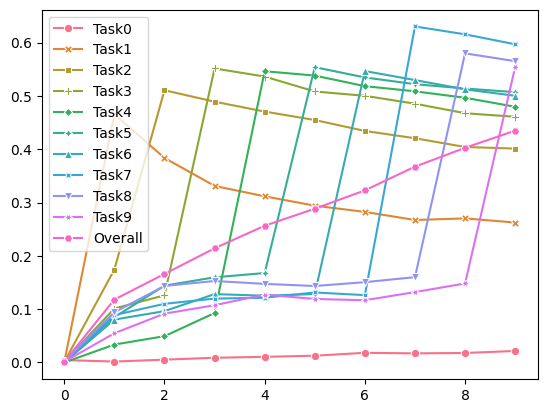

In [18]:
sns.lineplot(data=acc_df, dashes=False, markers=True)

# Store metrics

In [21]:
pickle.dump(accuracies, open(SAVED_METRICS_PATH / "ogd.pkl", "wb"))